In [24]:
import CommonFunc
import pandas as pd

df = pd.read_csv('resources/CO2Emissions_Canada.csv')


In [25]:
from sklearn.preprocessing import LabelEncoder

#удаляем дубликаты
df.drop_duplicates()

#выделяем числовые данные
numdata = pd.DataFrame(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                           'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                           'CO2 Emissions(g/km)']])

# Делаем энкодинг для категориальных признаков
label_encoder_1 = LabelEncoder()
label_encoder_2 = LabelEncoder()
label_encoder_3 = LabelEncoder()

vehicle_class = df[['Vehicle Class']].values.ravel()
fuel_type = df[['Fuel Type']].values.ravel()
transmission = df[['Transmission']].values.ravel()

encoded_vehicle_class = label_encoder_1.fit_transform(vehicle_class)
encoded_fuel_type = label_encoder_2.fit_transform(fuel_type)
encoded_transmission = label_encoder_3.fit_transform(transmission)

enc_1 = dict(zip(label_encoder_1.classes_,range(len(label_encoder_1.classes_))))
enc_2 = dict(zip(label_encoder_2.classes_,range(len(label_encoder_2.classes_))))
enc_3 = dict(zip(label_encoder_3.classes_,range(len(label_encoder_3.classes_))))

In [26]:
#Составляем матрицу данных X
X_ = numdata[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)']]
X_['Transmission'] = encoded_transmission
X_['Fuel Type'] = encoded_fuel_type
feature_names = X_.columns
X=X_.values

#Составляем и упрощаем до одномерного массива набор целевой переменной
y = numdata[['CO2 Emissions(g/km)']].values.ravel()

C:\Users\UserPc\AppData\Local\Temp\ipykernel_15892\2823032408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['Transmission'] = encoded_transmission
C:\Users\UserPc\AppData\Local\Temp\ipykernel_15892\2823032408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['Fuel Type'] = encoded_fuel_type


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 5908, number of used features: 5
[LightGBM] [Info] Start training from score 250.939573
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 2954, number of used features: 5
[LightGBM] [Info] Start training from score 251.809072
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 2954, number of used features: 5
[LightGBM] [Info] Start training

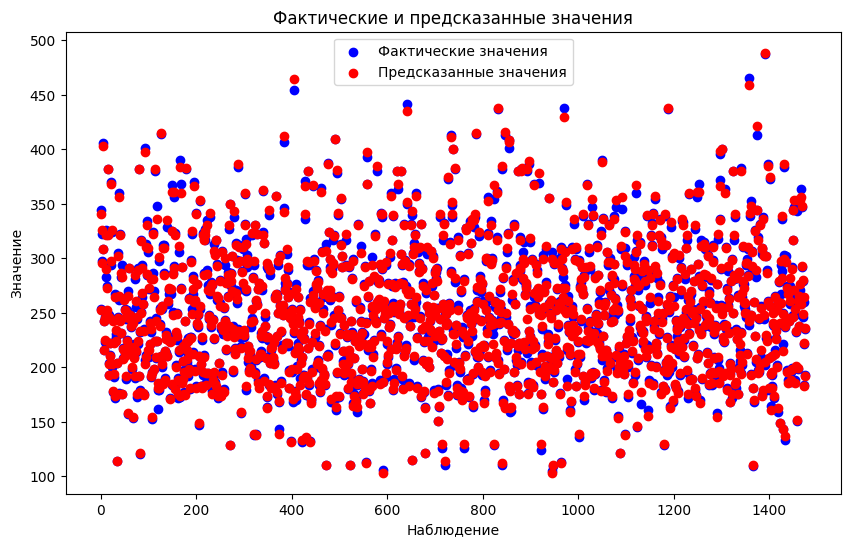

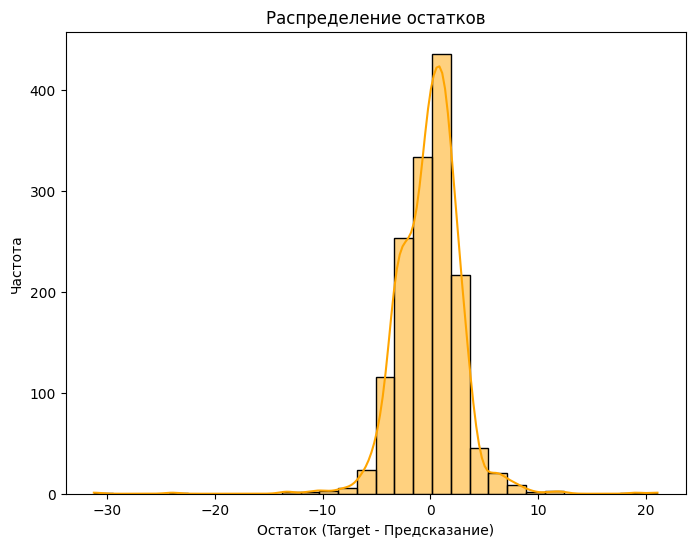

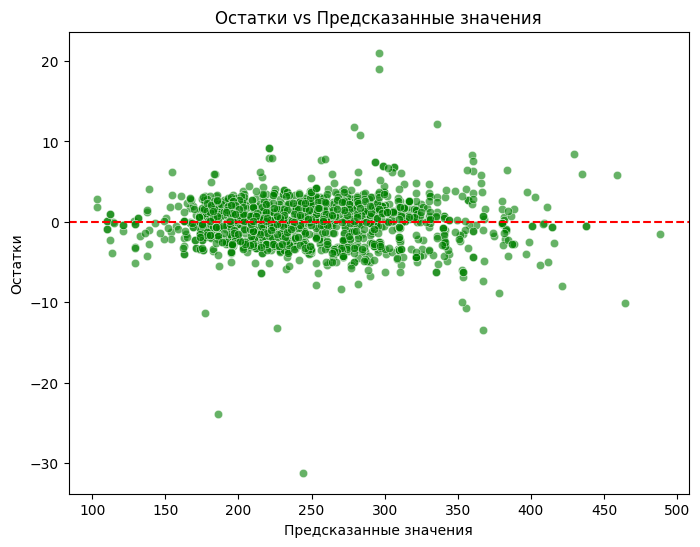

In [27]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Stacking Regressor
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_regresors = [
    ('gbr', GradientBoostingRegressor()),
    ('lgbmr', LGBMRegressor()),
    ('xgbr', XGBRegressor())
]

meta_regresors = RandomForestRegressor(max_depth = 10, max_features='log2', min_samples_split=2, n_estimators = 500)

stack_model = StackingRegressor(estimators=base_regresors, final_estimator=meta_regresors, cv=2)

stack_model.fit(X_train, y_train)


y_pred = stack_model.predict(X_test)


stacking_metrics = CommonFunc.getMetrics(y_test, y_pred)


CommonFunc.getRemains(y_test, y_pred)
